In [10]:
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
import datetime
!pip install pandas-datareader
import pandas_datareader.data as web
!pip install pandas-datareader

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from pandas.plotting import autocorrelation_plot

import quandl
quandl.ApiConfig.api_key = "API_KEY"

# Facebook Time Series from the last 60 months (adjusted closed prices): 

In [12]:
start = datetime.datetime(2015, 3, 3)
end = datetime.datetime(2020, 3, 3)
engine = "yahoo"

fb_stock = web.DataReader("FB", engine, start, end)
fb_stock

fb_stock.isnull().values.any() #no missing values

#Resampleing the data to get prices for the end of the business month. Select the Adjusted Close for each stock
fb_resample = fb_stock.resample('BM').last()
fb_resample
 
fb_adj = fb_resample.iloc[:, -1] #selecting only the adjusted close for each stock (get a time series)
fb_adj

Date
2015-03-31     82.220001
2015-04-30     78.769997
2015-05-29     79.190002
2015-06-30     85.769997
2015-07-31     94.010002
                 ...    
2019-11-29    201.639999
2019-12-31    205.250000
2020-01-31    201.910004
2020-02-28    192.470001
2020-03-31    185.889999
Freq: BM, Name: Adj Close, Length: 61, dtype: float64

# 3M Company (MMM) Time Series from the last 60 months (adjusted closed prices): 

In [13]:
mmm_stock = web.DataReader("MMM", engine, start, end)
mmm_stock

mmm_stock.isnull().values.any() #no missing values

mmm_resample = mmm_stock.resample('BM').last() #resample to business end
mmm_resample

mmm_adj = mmm_resample.iloc[:, -1] #selecting only the adjusted close
mmm_adj

Date
2015-03-31    139.815536
2015-04-30    132.559860
2015-05-29    135.692612
2015-06-30    131.615356
2015-07-31    129.090515
                 ...    
2019-11-29    163.675491
2019-12-31    170.086777
2020-01-31    152.964325
2020-02-28    145.185440
2020-03-31    141.294113
Freq: BM, Name: Adj Close, Length: 61, dtype: float64

# IBM Time Series from the last 60 months (adjusted closed prices): 

In [14]:
ibm_stock = web.DataReader("IBM", engine, start, end)
ibm_stock

ibm_stock.isnull().values.any() #no missing values

ibm_resample = ibm_stock.resample('BM').last() #resample to business end
ibm_resample

ibm_adj = ibm_resample.iloc[:, -1] #selecting only the adjusted close
ibm_adj

Date
2015-03-31    123.751266
2015-04-30    132.070740
2015-05-29    132.811462
2015-06-30    127.339348
2015-07-31    126.814835
                 ...    
2019-11-29    127.750282
2019-12-31    127.360703
2020-01-31    136.567856
2020-02-28    124.955879
2020-03-31    123.755768
Freq: BM, Name: Adj Close, Length: 61, dtype: float64

# Amazon Time Series from the last 60 months (adjusted closed prices): 

In [15]:
amzn_stock = web.DataReader("AMZN", engine, start, end)
amzn_stock

amzn_stock.isnull().values.any() #no missing values

amzn_resample = amzn_stock.resample('BM').last() #resample to business end
amzn_resample

amzn_adj = amzn_resample.iloc[:, -1] #selecting only the adjusted close
amzn_adj

Date
2015-03-31     372.100006
2015-04-30     421.779999
2015-05-29     429.230011
2015-06-30     434.089996
2015-07-31     536.150024
                 ...     
2019-11-29    1800.800049
2019-12-31    1847.839966
2020-01-31    2008.719971
2020-02-28    1883.750000
2020-03-31    1908.989990
Freq: BM, Name: Adj Close, Length: 61, dtype: float64

Using the pandas autocorrelation_plot() function to plot the autocorrelation of the adjusted month-end close prices for each of the stocks, we can check to see if any of these stocks have a correlation between adjusted price and time.

Text(0.5, 1.0, 'Autocorrelation of Adjusted Stock Prices')

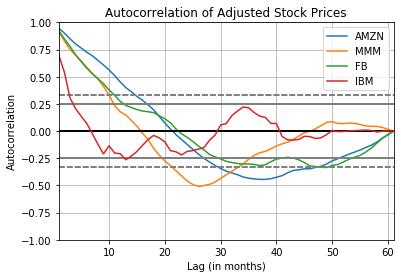

In [16]:
autocorrelation_plot(amzn_adj, label = 'AMZN')
autocorrelation_plot(mmm_adj, label = 'MMM')
autocorrelation_plot(fb_adj, label = 'FB')
autocorrelation_plot(ibm_adj, label = 'IBM')
plt.grid(True)
plt.xlabel('Lag (in months)')
plt.title('Autocorrelation of Adjusted Stock Prices')

- AMZN: We can see from month 0 (of the observation) to month ~14, the line is above the dotted line so the price is highly correlated during this period. The same can be said for month 30 to month ~47.

- MMM: From month 0 to month ~10; and month ~22 to month ~33, we can see a high correlation between the prices and time.

- FB: The only time we can see a high correlation between price and time is during month 0 to month ~11.

- IBM: Similarly to FB, the only time of high correlation between price and time is between month 0 to month ~3.


We can calculate the monthly returns for each stock using the shift() function and using the pandas autotocorrelation_plot() to plot the autocorrelation of the monthly returns. This also allows us to check for any correlation.

In [21]:
amzn_returns = (amzn_adj/amzn_adj.shift(1))-1
amzn_returns = amzn_returns.drop(amzn_returns.index[0]) #to get rid of the NaN value

mmm_returns = (mmm_adj/mmm_adj.shift(1))-1
mmm_returns = mmm_returns.drop(mmm_returns.index[0])

fb_returns = (fb_adj/fb_adj.shift(1))-1
fb_returns = fb_returns.drop(fb_returns.index[0])

ibm_returns = (ibm_adj/ibm_adj.shift(1))-1
ibm_returns = ibm_returns.drop(ibm_returns.index[0])

Text(0.5, 1.0, 'Monthly Returns of Adjusted Stock Prices')

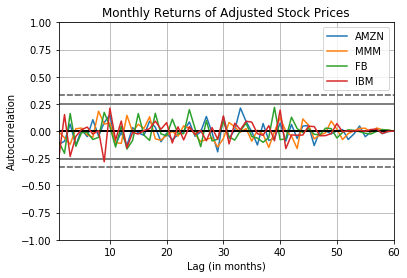

In [22]:
autocorrelation_plot(amzn_returns, label = 'AMZN')
autocorrelation_plot(mmm_returns, label = 'MMM')
autocorrelation_plot(fb_returns, label = 'FB')
autocorrelation_plot(ibm_returns, label = 'IBM')
plt.grid(True)
plt.xlabel('Lag (in months)')
plt.title('Monthly Returns of Adjusted Stock Prices')

As we can see above, the returns for all the stock are not as highly correlated once the monthly returns are calculated as none of them pass the dotted lines on the chart.

Combining all 4 time series (returns) into a single DataFrame,we can visualize the correlation between the returns of all pairs of stocks using a scatter plot matrix.

In [23]:
returns_df = pd.concat([amzn_returns, mmm_returns, fb_returns, ibm_returns], join='outer', axis=1)
returns_df.columns = ['AMZN', 'MMM', 'FB', 'IBM'] #renaming the columns; verified that the columns are in the same order
returns_df

,AMZN,MMM,FB,IBM
Date,,,,
2015-04-30,0.133512,-0.051895,-0.041961,0.067227
2015-05-29,0.017663,0.023633,0.005332,0.005609
2015-06-30,0.011323,-0.030048,0.083091,-0.041202
2015-07-31,0.235113,-0.019183,0.096071,-0.004119
2015-08-31,-0.043383,-0.054254,-0.048718,-0.079464
2015-09-30,-0.001950,-0.002603,0.005256,-0.019744
2015-10-30,0.222724,0.108909,0.134260,-0.033731
2015-11-30,0.062150,0.002537,0.022261,0.004624
2015-12-31,0.016682,-0.037936,0.004029,-0.012911


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000212E91F3D88>,
      dtype=object)

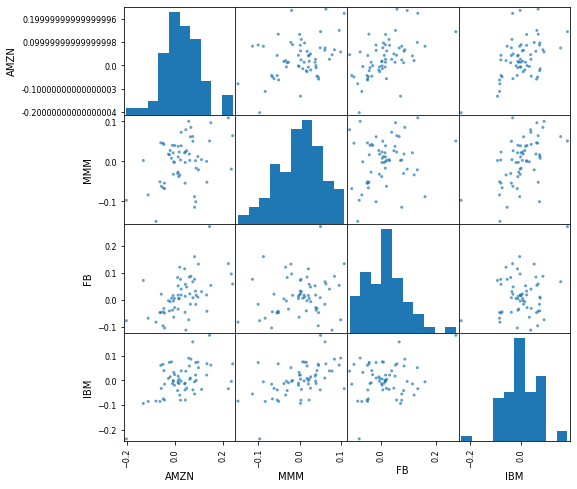

In [20]:
from pandas.plotting import scatter_matrix
scatter_matrix(returns_df, alpha = 0.7, figsize = (8,8))

The scatter plots look vaguely like clouds indicating there is little to no correlation between them. However, we can see that AMZN and FB have some what of a correlation as there is a general positive relationship beween the two; as AMZN increases, FB seems to also increase. These are the only 2 stocks that seem to be correlated.